In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import csv
import operator
from collections import defaultdict
import math
import sys




from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12

import seaborn as sns
sns.set(font_scale=1.2)
sns.set_style("white")
sns.set_style({'font.family':'serif'})


sys.path.insert(0, '../../')


from plot.plot_utils import *
from semi_synthetic_graphs.src.config import iterations, alpha

In [2]:
mapping_configurations = {
    "N0": "TUENTI-A16",
    "N1": {"s_m": 0.1, "h_m": 0.4, "h_M": 0.0},
    "N2": {"s_m": 0.45, "h_m": 0.5, "h_M": 0.0,},
    "N3": {"s_m": 0.3, "h_m": -0.25, "h_M": 0.0,},
    "N4": {"s_m": 0.3, "h_m": 0.5, "h_M": 0.2}
}

policy = "fc"

vec_algoname = ["als", "salsa", "ada", "random"]


markers = ["v", "D", "X", "*"]

colors = ["gray", "indianred", "royalblue", "darkorange"]

recsys_dict = {"ada": "A-ADA",
              "random": "A-RND",
              "als": "A-ALS",
              "salsa": "A-SLS"}

policy_dict = {"random": "P-RND",
              "fc": "P-FLC",
              "lazy": "P-LZY"}

In [3]:
track_all_visibilities = {} #questo mi mappa i pickle del numero di volte che i colori sono stati raccomandati per ogni configurazione

"""
track_all_visibilities[configurazione + recsys + policy][iterazione][colore] = numero di volte che è stato raccomandato

"""

mapping_configuration_folder = {} #mi mappa la directory che mi serve per ogni configurazione

"""

mapping_configuration_folder[configurazione + recsys + policy] = directory

"""

for configuration in mapping_configurations:
    
    N = mapping_configurations[configuration]

    for algoname in vec_algoname:
        
        if configuration == "N0":
            
            directory = "../../dataset/out/" + N
            
            

            foldername = (N,
                            "it" + str(iterations),
                            "sampling" + str(alpha),
                            "policy-" + str(policy),
                            "algoname-" + str(algoname))

            foldername = "_".join(foldername)
        
        else:
            
            directory = "../../semi_synthetic_graphs/out/synth/"
            
            s_m = N["s_m"]
        
            h_m = N["h_m"]

            h_M = N["h_M"]

            folder1 = ("sim20-topk3-TUENTI-A16",
                         "s_m" + str(s_m),
                         "hm" + str(h_m),
                         "hM" + str(h_M))

            folder1 = "-".join(folder1)
            
            folder2 = "policy-" + policy + "_algoname-" + algoname
            
            foldername = folder1 + "/" + folder2
        

        mapping_configuration_folder[configuration + "_" + policy + "_" + algoname] = directory + "/" + foldername
        
        with open(directory + "/" + foldername + "/track_visibility.p", "rb") as f:
            track_all_visibilities[configuration + "_" + policy + "_" + algoname] = pickle.load(f)

In [6]:
visibility_and_percentage_edge_for_configuration = {} #mi mappa per ogni configurazione la visibility della minority e la % di archi aggiunti

"""

visibility_and_percentage_edge_for_configuration[configurazione + recsys + policy]['percentage_edge_accepted'] = lista % archi aggiunti

visibility_and_percentage_edge_for_configuration[configurazione + recsys + policy]["V_m"] = lista visibility minority per ogni iterazione

visibility_and_percentage_edge_for_configuration[configurazione + recsys + policy]['minority_size'] = minority size


"""


for configuration in mapping_configurations:
    
    print("----")
    print(configuration)
    
    if configuration == "N0":
        
        s_m = 0.3 ## la size di tuenti-a16
        
    else:
        
        s_m = mapping_configurations[configuration]["s_m"]

    for algoname in vec_algoname:
        
        print(algoname)
        
        config_algoname = configuration + "_" + policy + "_" + algoname
        
        folder = mapping_configuration_folder[config_algoname]
        
        visibility_and_percentage_edge_for_configuration[config_algoname] = dict.fromkeys(["percentage_edge_accepted", "V_m", "minority_size"])
        
        visibility_and_percentage_edge_for_configuration[config_algoname]["minority_size"] = s_m
        
        with open(folder + "/final-graph.p", "rb") as f:
            final_graph = pickle.load(f)
        
        percentage_edge_accepted = percentage_edge_added(final_graph, iterations)
    
        visibility_and_percentage_edge_for_configuration[config_algoname]["percentage_edge_accepted"] = percentage_edge_accepted
        
        
        vis_min = []
        
        for iteration in range(iterations):
            
            red_recommended = track_all_visibilities[config_algoname][iteration]["red"]
            
            blue_recommended = track_all_visibilities[config_algoname][iteration]["blue"]
            
            total_recommended = red_recommended + blue_recommended

            V_min = red_recommended/total_recommended
            
            vis_min.append(V_min)
            
        visibility_and_percentage_edge_for_configuration[config_algoname]["V_m"] = vis_min

----
N0
als
salsa
ada
random
----
N1
als
salsa
ada
random
----
N2
als
salsa
ada
random
----
N3
als
salsa
ada
random
----
N4
als
salsa
ada
random


N0_fc_als
N0_fc_salsa
N0_fc_ada
N0_fc_random


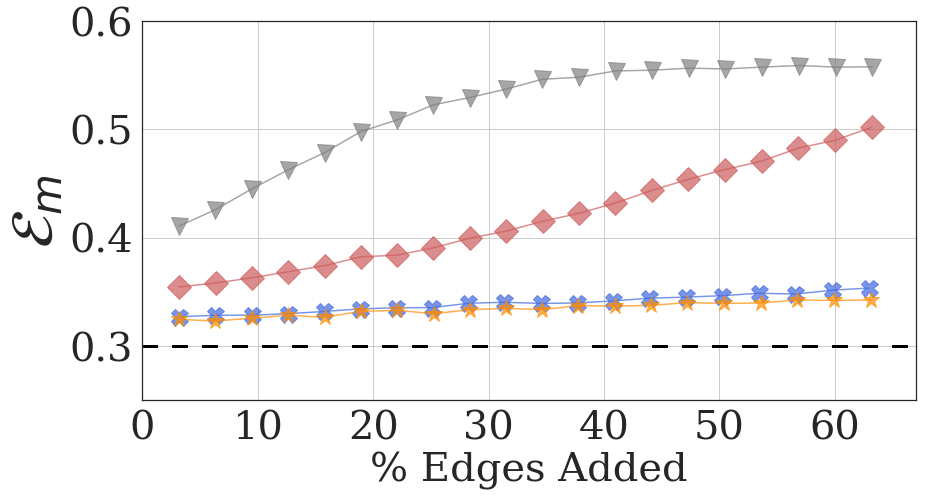

N1_fc_als
N1_fc_salsa
N1_fc_ada
N1_fc_random


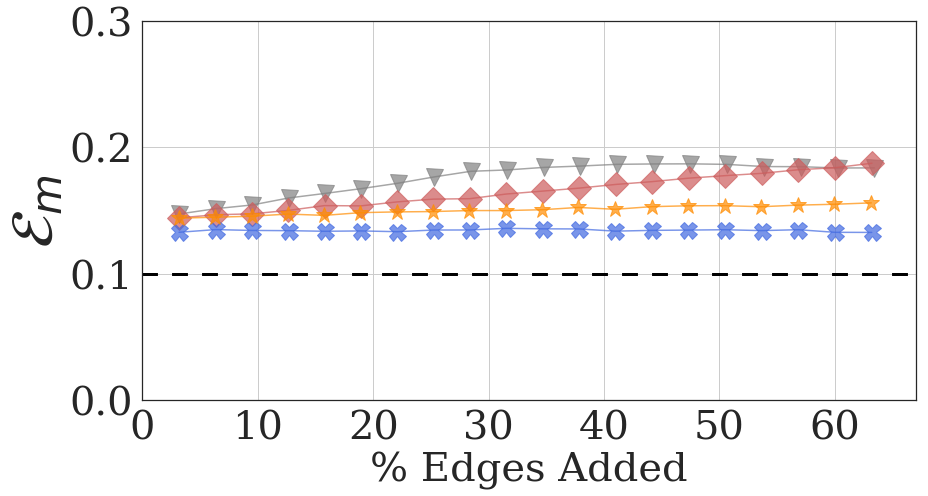

N2_fc_als
N2_fc_salsa
N2_fc_ada
N2_fc_random


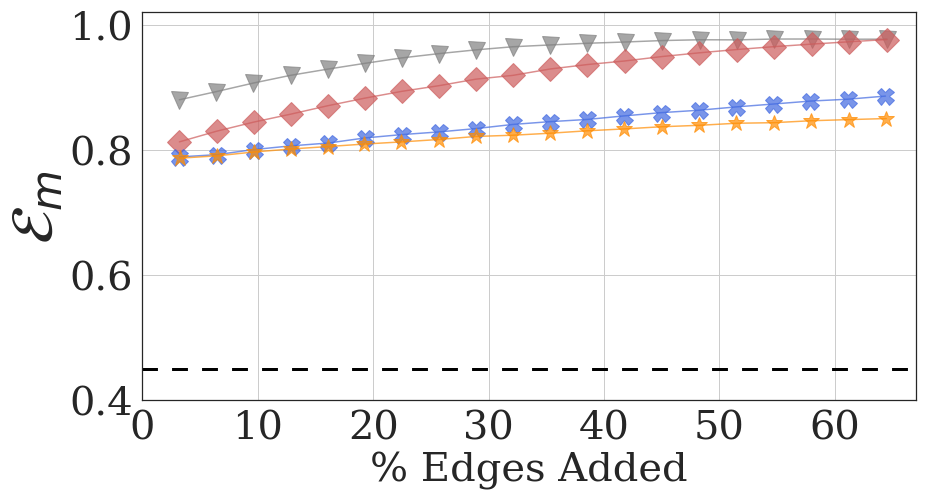

N3_fc_als
N3_fc_salsa
N3_fc_ada
N3_fc_random


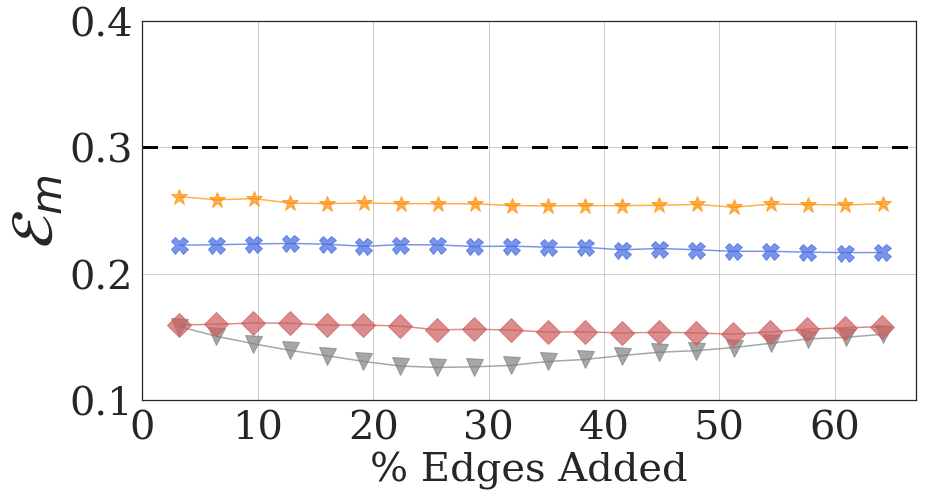

N4_fc_als
N4_fc_salsa
N4_fc_ada
N4_fc_random


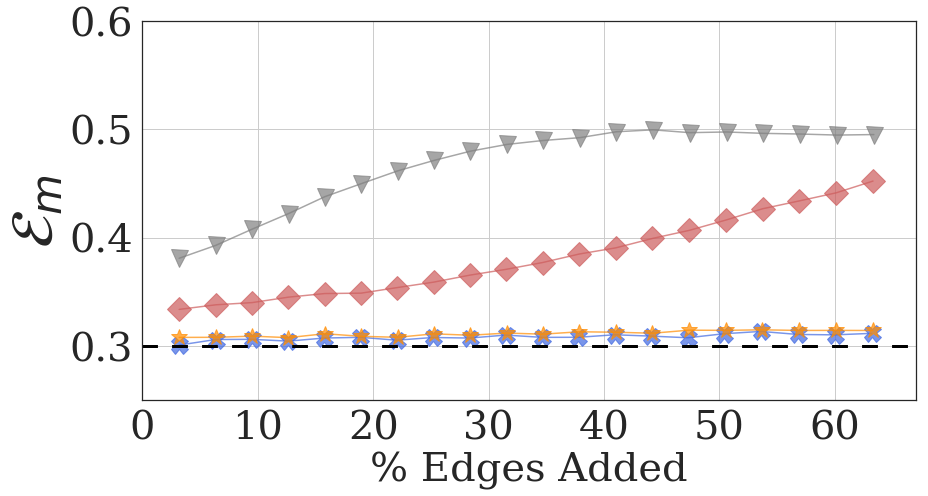

In [64]:
set_yaxis_config = {"N0": (0.25, 0.6),
                   "N1": (0, 0.3),
                   "N2": (0.4, 1.02),
                   "N3": (0.1, 0.4),
                   "N4": (0.25, 0.6)}

set_ytick_config = {"N0": [0.3, 0.4, 0.5, 0.6],
                   "N1": [0, 0.1, 0.2,  0.3],
                   "N2": [0.4, 0.6, 0.8,  1],
                   "N3": [0.1, 0.2, 0.3, 0.4],
                   "N4": [0.3, 0.4, 0.5, 0.6]}


for configuration in mapping_configurations:
    
    fig = plt.figure(figsize=(13, 7))
    ax = fig.add_subplot(111)
    
    for algoname, color, marker in zip(vec_algoname, colors, markers):
        
        config_algoname = configuration + "_" + policy + "_" + algoname
        
        print(config_algoname)
        
        x = visibility_and_percentage_edge_for_configuration[config_algoname]["percentage_edge_accepted"]
        
        y = visibility_and_percentage_edge_for_configuration[config_algoname]["V_m"]
        
        plc = policy_dict[policy]
        recsys = recsys_dict[algoname]
        
        size = visibility_and_percentage_edge_for_configuration[config_algoname]["minority_size"]
        
        
        plt.plot(x, y, marker = marker, color = color, linewidth = 1.5, markersize = 17, alpha = 0.7, label = recsys)
        
        
        plt.axhline(size, color = "black",  linewidth = 3, linestyle = (0, (5, 5)))
        
        
        
    #plt.title("Visibility of Minority in " + configuration, fontsize = 25)
    #plt.legend(fontsize = 16)
    
    plt.xlabel("% Edges Added", fontsize = 40)
        
    plt.ylabel("$\mathcal{E}_m$", fontsize = 60)
        
    plt.xticks(fontsize = 40)
    
    #plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize = 40)
    plt.yticks(set_ytick_config[configuration], fontsize = 40)
    
    plt.xlim(0, 67)
    
    #plt.ylim(0,1.02)
    
    plt.ylim(set_yaxis_config[configuration])
    
    
    plt.grid()
        
    plt.tight_layout()
    
    plt.savefig("vm_config/V_m-" + configuration + "_" + policy +  ".pdf", format = "pdf")
    
    plt.show()

In [22]:
##salva la visibility della minority con % edge per N0, N1, N2, N3, N4 in tsv

for configuration in mapping_configurations:
        
    with open("tsv_v_m_edge/" + configuration + ".tsv", "w") as f:

        writer = csv.writer(f, delimiter = '\t')
        
        for algoname in vec_algoname:
        
            config_algoname = configuration + "_" + policy + "_" + algoname
            
            writer.writerow([config_algoname] + visibility_and_percentage_edge_for_configuration[config_algoname]["V_m"] + visibility_and_percentage_edge_for_configuration[config_algoname]["percentage_edge_accepted"])
        
        
        
        